In [1]:
from fitsio import FITS
import fitsio
import matplotlib.pyplot as plt
import astropy.io.fits as pyfits
import numpy as np
import os
from matplotlib.pyplot import rcParams
import matplotlib._color_data as mcd
import math
rcParams['figure.figsize'] = 10, 5
rcParams['lines.linewidth'] = 2
rcParams['axes.labelsize'] = 15
rcParams['legend.fontsize'] = 12

import h5py
from scipy import interpolate
from picca import wedgize

In [21]:
def histo(x, cut=None, range=None, bins=50, alpha=1, clear=True, color='blue', xlab=None, text=None, datarange=None, grd=True, loc='best'):
        if cut is None:
                newx = x
        else:
                newx = x[cut]
        if xlab: plt.xlabel(xlab)
        lab = ' N: '+str(len(newx))+'\n mean: {0:.3g}'.format(np.mean(newx))+'\n rms: {0:.3g}'.format(np.std(newx))
        if text is not None: lab = text+'\n'+lab
        truc=plt.hist(newx, range=range, density=True, bins=bins, alpha=alpha, color=color, label=lab)
        plt.legend(loc=loc)
        if grd: plt.grid()
        return np.array([len(newx), np.mean(newx), np.std(newx)])

# Get DLA and BAL catalog

In [3]:
NHI=[]
Z_DLA=[]
TARGETID=[] 
DLAID=[]

### Set directory to desi spectra:
spectrapath='/global/cfs/cdirs/desi/users/hiramk/desi/everest/main/mock/london/v9.0.0/everest_main-0.134/spectra-16'
### Run DLA finder to get sightlines:
item1 = os.listdir(spectrapath)
for k in item1:
    itemlist=os.listdir(spectrapath+'/'+str(k))
    for j in itemlist:
        try:
            datafile_path=spectrapath+'/'+str(k)+'/'+str(j)
            truth=os.path.join(datafile_path, 'truth-16-{}.fits'.format(j))
            NHI=NHI+FITS(truth)['DLA_META']['NHI'][:].tolist()
            Z_DLA=Z_DLA+FITS(truth)['DLA_META']['Z_DLA'][:].tolist()
            TARGETID=TARGETID+FITS(truth)['DLA_META']['TARGETID'][:].tolist()
            DLAID=DLAID+FITS(truth)['DLA_META']['DLAID'][:].tolist()
        except:
            print('fail',k,j)
            continue
    print('%s done'%k)

7 done
6 done
11 done
fail 19 1944
19 done
17 done
5 done
16 done
30 done
20 done
9 done
28 done
12 done
15 done
8 done
18 done


In [10]:
BI_CIV=[]
AI_CIV=[]
TARGETID_BAL=[] 
Z_BAL=[]

### Set directory to desi spectra:
spectrapath='/global/cfs/cdirs/desi/users/hiramk/desi/everest/main/mock/london/v9.0.0/everest_main-0.134/spectra-16'
### Run DLA finder to get sightlines:
item1 = os.listdir(spectrapath)
for k in item1:
    itemlist=os.listdir(spectrapath+'/'+str(k))
    for j in itemlist:
        try:
            datafile_path=spectrapath+'/'+str(k)+'/'+str(j)
            truth=os.path.join(datafile_path, 'truth-16-{}.fits'.format(j))
            BI_CIV=BI_CIV+FITS(truth)['BAL_META']['BI_CIV'][:].tolist()
            AI_CIV=AI_CIV+FITS(truth)['BAL_META']['AI_CIV'][:].tolist()
            TARGETID_BAL=TARGETID_BAL+FITS(truth)['BAL_META']['TARGETID'][:].tolist()
            Z_BAL=Z_BAL+FITS(truth)['BAL_META']['Z'][:].tolist()
        except:
            print('fail',k,j)
            continue
    print('%s done'%k)

fail 7 786
fail 7 793
7 done
fail 6 635
6 done
fail 11 1185
11 done
fail 19 1955
fail 19 1944
19 done
17 done
5 done
fail 16 1603
fail 16 1648
16 done
30 done
20 done
9 done
fail 28 2809
28 done
12 done
15 done
8 done
18 done


# Catalog

# file_dla_everest = FITS('/global/cfs/cdirs/desi/users/jqzou/Everest/Healpix/DLA_catalog/afterburner/dla_afterburners_main_dark.fits')
# file_dla_mocks = FITS('/global/cfs/cdirs/desi/users/hiramk/desi/everest/')

## Directory to DESI mocks:
## /global/cfs/cdirs/desi/users/hiramk/desi/everest/

In [50]:
file_qso = FITS('/global/cfs/cdirs/desi/users/hiramk/desi/everest/main/mock/london/v9.0.0/everest_main-0.134/spectra-16/11/1167/truth-16-1167.fits')

In [ ]:
BI_CIV, AI_CIV, VMIN, VMAX, fraction of BAL quasars,

# DLA

In [25]:
file_dla_everest = FITS('/global/cfs/cdirs/desi/users/jqzou/Everest/Healpix/DLA_catalog/afterburner/dla_afterburners_main_dark.fits')
#file_dla_mocks = FITS('/global/cfs/cdirs/desi/users/hiramk/desi/everest/')
NHI_mock=NHI
Z_DLA_mock=Z_DLA
TARGETID_mock=TARGETID
DLAID_mock=DLAID

mask_dla_confidence=file_dla_everest[1]['DLA_CONFIDENCE'][:]>0.4
mask_dla_snr=file_dla_everest[1]['SNR'][:]>3
#NHI_everest=file_dla_everest[1]['NHI'][:][mask_dla_confidence&mask_dla_snr]
#Z_DLA_everest=file_dla_everest[1]['Z'][:][mask_dla_confidence&mask_dla_snr]
NHI_everest=file_dla_everest[1]['NHI'][:][mask_dla_confidence]
Z_DLA_everest=file_dla_everest[1]['Z'][:][mask_dla_confidence]

#TARGETID_everest=file_dla_everest[1]['NHI'][:]
#DLAID_everest=file_dla_everest[1]['NHI'][:]

In [89]:
file_dla_everest[1]


  file: /global/cfs/cdirs/desi/users/jqzou/Everest/Healpix/DLA_catalog/afterburner/dla_afterburners_main_dark.fits
  extension: 1
  type: BINARY_TBL
  extname: DLACAT
  rows: 120233
  column info:
    TARGET_RA           f8  
    TARGET_DEC          f8  
    ZQSO                f8  
    Z                   f8  
    TARGETID            i8  
    SNR                 f8  
    DLAID              S22  
    NHI                 f8  
    DLA_CONFIDENCE      f8  
    NHI_STD             f8  
    ABSORBER_TYPE       S6  
    BALMASK             u1  

array([120233.,     nan,     nan])

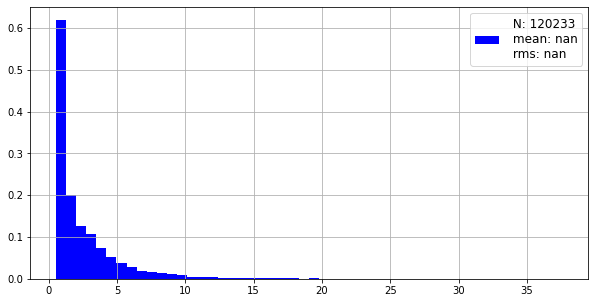

In [128]:
histo(file_dla_everest[1]['SNR'][:])

array([3.11980000e+04, 2.01376724e+01, 4.84084529e-01])

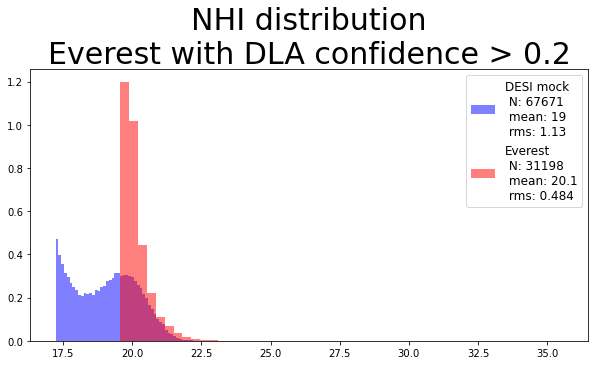

In [131]:
plt.title('NHI distribution\nEverest with DLA confidence > 0.2',fontsize=30)
histo(NHI_mock,text='DESI mock',color='blue',alpha=0.5)
histo(NHI_everest,text='Everest',color='red',alpha=0.5)

array([3.11980000e+04, 2.01376724e+01, 4.84084529e-01])

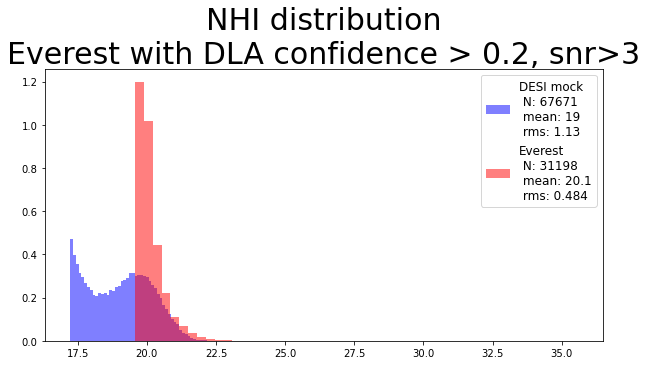

In [137]:
plt.title('NHI distribution\nEverest with DLA confidence > 0.2, snr>3',fontsize=30)
histo(NHI_mock,text='DESI mock',color='blue',alpha=0.5)
histo(NHI_everest,text='Everest',color='red',alpha=0.5)

array([1.80390000e+04, 2.02081439e+01, 4.49917125e-01])

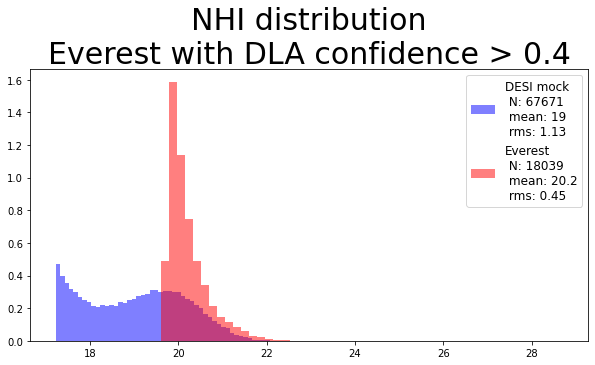

In [134]:
plt.title('NHI distribution\nEverest with DLA confidence > 0.4',fontsize=30)
histo(NHI_mock,text='DESI mock',color='blue',alpha=0.5)
histo(NHI_everest,text='Everest',color='red',alpha=0.5)

array([4.80100000e+03, 2.02933663e+01, 3.40324812e-01])

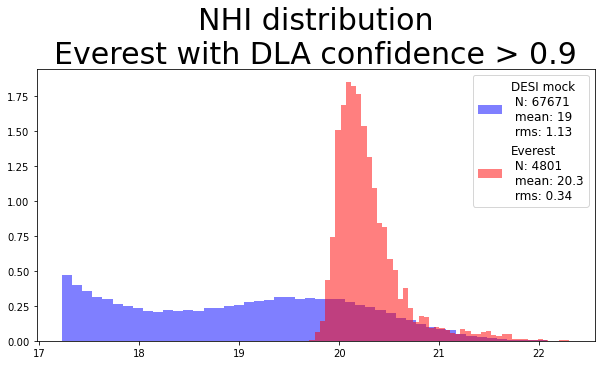

In [90]:
plt.title('NHI distribution\nEverest with DLA confidence > 0.9',fontsize=30)
histo(NHI_mock,text='DESI mock',color='blue',alpha=0.5)
histo(NHI_everest,text='Everest',color='red',alpha=0.5)

array([2.78200000e+04, 2.03499206e+01, 3.72924430e-01])

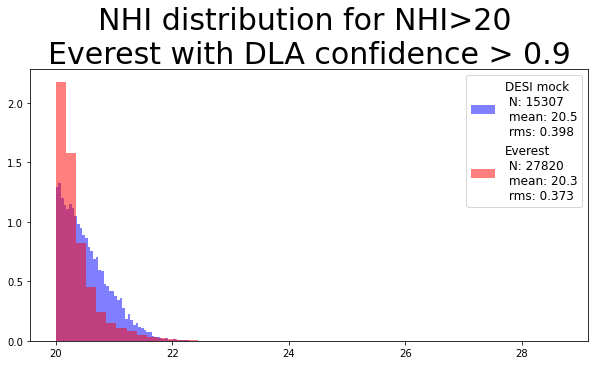

In [31]:
plt.title('NHI distribution for NHI>20 \nEverest with DLA confidence > 0.9',fontsize=30)
NHI_mock = np.array(NHI_mock)
histo(NHI_mock[NHI_mock>20],text='DESI mock',color='blue',alpha=0.5)
histo(NHI_everest[NHI_everest>20],text='Everest',color='red',alpha=0.5)

array([1.15654000e+05, 2.58173890e+00, 5.45904479e-01])

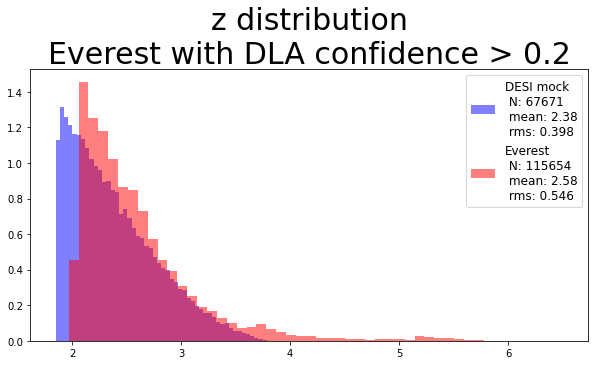

In [53]:
plt.title('z distribution\nEverest with DLA confidence > 0.2',fontsize=30)
histo(Z_DLA_mock,text='DESI mock',color='blue',alpha=0.5)
histo(Z_DLA_everest,text='Everest',color='red',alpha=0.5)

array([4.00090000e+04, 2.58732756e+00, 4.93693220e-01])

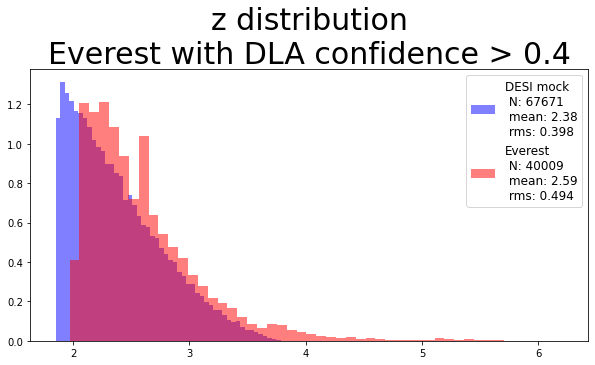

In [51]:
plt.title('z distribution\nEverest with DLA confidence > 0.4',fontsize=30)
histo(Z_DLA_mock,text='DESI mock',color='blue',alpha=0.5)
histo(Z_DLA_everest,text='Everest',color='red',alpha=0.5)

array([4.80100000e+03, 2.65856934e+00, 4.59112974e-01])

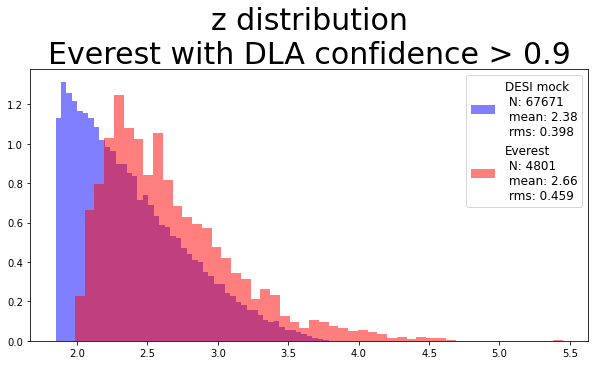

In [91]:
plt.title('z distribution\nEverest with DLA confidence > 0.9',fontsize=30)
histo(Z_DLA_mock,text='DESI mock',color='blue',alpha=0.5)
histo(Z_DLA_everest,text='Everest',color='red',alpha=0.5)

In [33]:
np.min(Z_DLA_everest)

1.9688510595394413

array([4.00090000e+04, 2.58732756e+00, 4.93693220e-01])

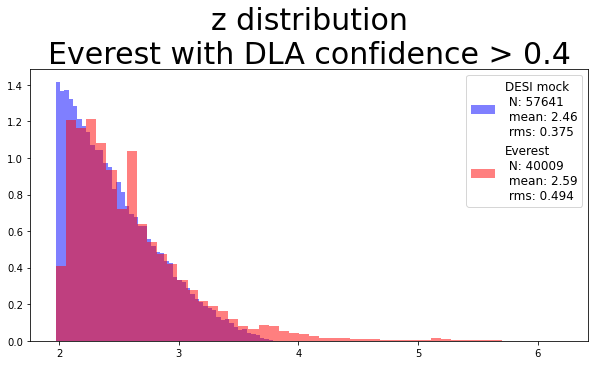

In [34]:
plt.title('z distribution\nEverest with DLA confidence > 0.4',fontsize=30)
Z_DLA_mock = np.array(Z_DLA_mock)
histo(Z_DLA_mock[Z_DLA_mock>1.968],text='DESI mock',color='blue',alpha=0.5)
histo(Z_DLA_everest,text='Everest',color='red',alpha=0.5)

# BAL

In [93]:
file_bal_everest = FITS('/global/cfs/cdirs/desi/users/martini/bal-catalogs/everest/qso_targets-main-dark-bal.fits')
file_qso_everest = FITS('/global/cfs/cdirs/desi/users/lucasnap/QSO_CATALOGS_HP/everest/qso_afterburners_full-main-dark.fits')

In [49]:
file_bal_everest['ZCATALOG']['SPECTYPE'][:][file_bal_everest['ZCATALOG']['SPECTYPE'][:]=='QSO'].shape

(234997,)

In [98]:
BI_CIV_mock=BI_CIV
AI_CIV_mock=AI_CIV
TARGETID_BAL_mock=TARGETID_BAL
Z_BAL_mock=Z_BAL

mask_bal = (file_bal_everest['ZCATALOG']['SPECTYPE'][:]=='QSO')&(file_bal_everest['ZCATALOG']['Z'][:]>1.8)
BI_CIV_everest=file_bal_everest['ZCATALOG']['BI_CIV'][:][mask_bal]
AI_CIV_everest=file_bal_everest['ZCATALOG']['AI_CIV'][:][mask_bal]
TARGETID_BAL_everest=file_bal_everest['ZCATALOG']['TARGETID'][:][mask_bal]
Z_BAL_everest=file_bal_everest['ZCATALOG']['Z'][:][mask_bal]

array([1.09149000e+05, 2.37394947e+00, 4.80065710e-01])

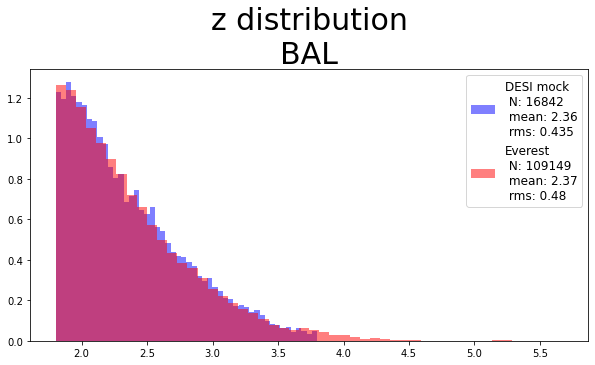

In [96]:
plt.title('z distribution\nBAL',fontsize=30)
histo(Z_BAL_mock,text='DESI mock',color='blue',alpha=0.5)
histo(Z_BAL_everest,text='Everest',color='red',alpha=0.5)

/global/homes/t/tanting/.conda/envs/picca_plots/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/global/homes/t/tanting/.conda/envs/picca_plots/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/global/homes/t/tanting/.conda/envs/picca_plots/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


(0.0, 20000.0)

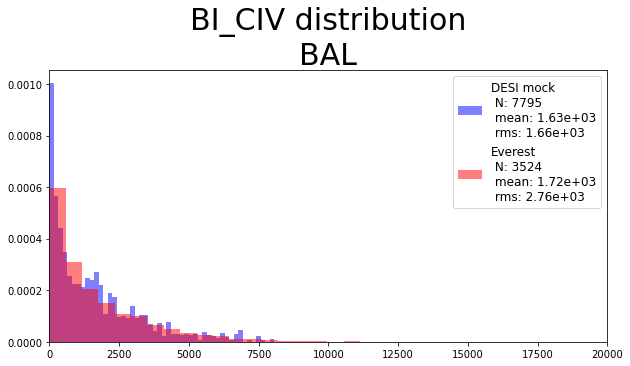

In [109]:
plt.title('BI_CIV distribution\nBAL',fontsize=30)
mask_bal_mock_bi_ai = (np.log(BI_CIV_mock)>0)&(np.log(AI_CIV_mock)>0)
mask_bal_everest_bi_ai = (np.log(BI_CIV_everest)>0)&(np.log(AI_CIV_everest)>0)
BI_CIV_mock_bi_ai = np.array(BI_CIV_mock)[mask_bal_mock_bi_ai]
BI_CIV_everest_bi_ai = np.array(BI_CIV_everest)[mask_bal_everest_bi_ai]
histo(BI_CIV_mock_bi_ai,text='DESI mock',color='blue',alpha=0.5)
histo(BI_CIV_everest_bi_ai,text='Everest',color='red',alpha=0.5,bins=200)
plt.xlim(0,20000)

(0.0, 20000.0)

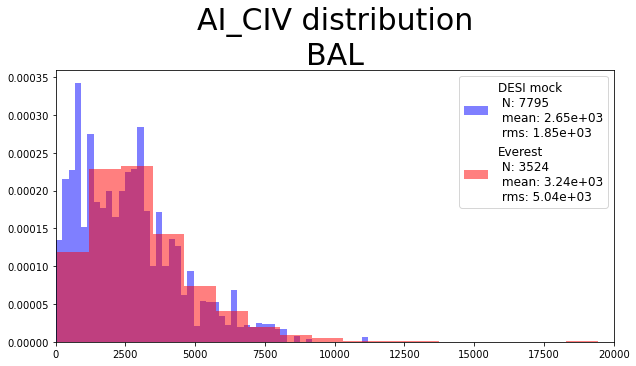

In [107]:
plt.title('AI_CIV distribution\nBAL',fontsize=30)
AI_CIV_mock_bi_ai = np.array(AI_CIV_mock)[mask_bal_mock_bi_ai]
AI_CIV_everest_bi_ai = np.array(AI_CIV_everest)[mask_bal_everest_bi_ai]
histo(AI_CIV_mock_bi_ai,text='DESI mock',color='blue',alpha=0.5,bins=50)
histo(AI_CIV_everest_bi_ai,text='Everest',color='red',alpha=0.5,bins=200)
plt.xlim(0,20000)

## BAL ratio

In [ ]:
z>2.1

In [121]:
mask_bal_lya = (file_bal_everest['ZCATALOG']['SPECTYPE'][:]=='QSO')&(file_bal_everest['ZCATALOG']['Z'][:]>2.1)
N_bal = file_bal_everest['ZCATALOG']['SPECTYPE'][:][mask_bal_lya ].shape[0]
N_bal_BI_0 = file_bal_everest['ZCATALOG']['SPECTYPE'][:][mask_bal_lya&(file_bal_everest['ZCATALOG']['BI_CIV'][:]>0)].shape[0]
N_bal_BI_1000 = file_bal_everest['ZCATALOG']['SPECTYPE'][:][mask_bal_lya&(file_bal_everest['ZCATALOG']['BI_CIV'][:]>1000)].shape[0]
N_qso = file_qso_everest[1]['SPECTYPE'][:][file_qso_everest[1]['Z'][:]>2.1].shape[0]

In [113]:
N_bal_BI_1000

1245

In [114]:
N_bal_BI_0

2384

In [119]:
N_qso

124439

In [122]:
ratio_bal = N_bal/N_qso
ratio_bal_BI_0 = N_bal_BI_0/N_qso
ratio_bal_BI_1000 = N_bal_BI_1000/N_qso
print('ratio of qso all bal:', ratio_bal)
print('ratio of qso with bal BI>0:', ratio_bal_BI_0)
print('ratio of qso with bal BI>1000:', ratio_bal_BI_1000)

ratio of qso all bal: 0.8564826076380443
ratio of qso with bal BI>0: 0.02899537825346631
ratio of qso with bal BI>1000: 0.015142301143274143
